# QCoDeS Example with Tektronix TPS2012

In [1]:
%matplotlib nbagg
import binascii
import logging

import matplotlib.pyplot as plt
import qcodes as qc
import numpy as np
import qcodes.instrument_drivers.tektronix.TPS2012 as tektps
from qcodes.plots.qcmatplotlib import MatPlot
from qcodes.measure import Measure

from time import time, sleep

logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

Logging hadn't been started.
Activating auto-logging. Current session state plus future input saved.
Filename       : C:\Users\Jens-Work\.qcodes\logs\command_history.log
Mode           : append
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active
Qcodes Logfile : C:\Users\Jens-Work\.qcodes\logs\201006-24644-qcodes.log


In [2]:
tps = tektps.TPS2012('TPS1', 'ASRL1::INSTR')

Connected to: TEKTRONIX TPS 2012B (serial:0, firmware:CF:91.1CT FV:v11.10) in 0.44s


In [3]:
# For good measures, one may clear out old messages
tps.clear_message_queue()

## SETTING UP AN ACQUISITION
The driver supports basic setting of scales and triggers.

In this example, we want to look at a 10 kHz sine, 100 mVpp with a -50 mV offset.

The sine is on channel **1**, while the sync (0 V to 3 V square wave) signal from the function generator is on channel **2**.

In [4]:
# we don't want to see the ref. signal, only the sine
tps.ch1_state('ON')
tps.ch2_state('OFF')

# horizontal
tps.horizontal_scale.set(10e-6)
# channel 1
tps.ch1_scale.set(50e-3)  # V/div
tps.ch1_position.set(2)  # divisions
# channel 2
tps.ch2_scale.set(1)
tps.ch2_position.set(-3)
# trigger
tps.trigger_type.set('EDGE')
tps.trigger_source.set('CH2')
tps.trigger_level.set(1.5)

## ACQUIRING THE CURVES FROM THE OSCILLOSCOPE
There is a simple command to get two arrays for the horizontal and vertical data.

Because this is early beta version you must currently call `set_set_points` on each channel just before reading a trace from the channel. This is a limitation in the current dataset/loop of qcodes. You should also ensure that the scope has been triggered at these settings before calling set_set_points or you will get inconsitent data. 

In this example notebook we use force_trigger to ensure that we always have data when setting the set_points

In [5]:
tps.force_trigger()
sleep(10*tps.horizontal_scale.get_latest())
tps.ch1_curvedata.prepare_curvedata()
tps.ch2_curvedata.prepare_curvedata()
data = Measure(tps.ch1_curvedata, tps.ch2_curvedata).run()

DataSet:
   location = 'data/2017-05-08/#006_{name}_16-21-59'
   <Type>   | <array_id>               | <array.name>      | <array.shape>
   Measured | TPS1_scope_measurement_0 | scope_measurement | (2500,)
   Measured | TPS1_scope_measurement_1 | scope_measurement | (2500,)
acquired at 2017-05-08 16:22:13


<IPython.core.display.Javascript object>


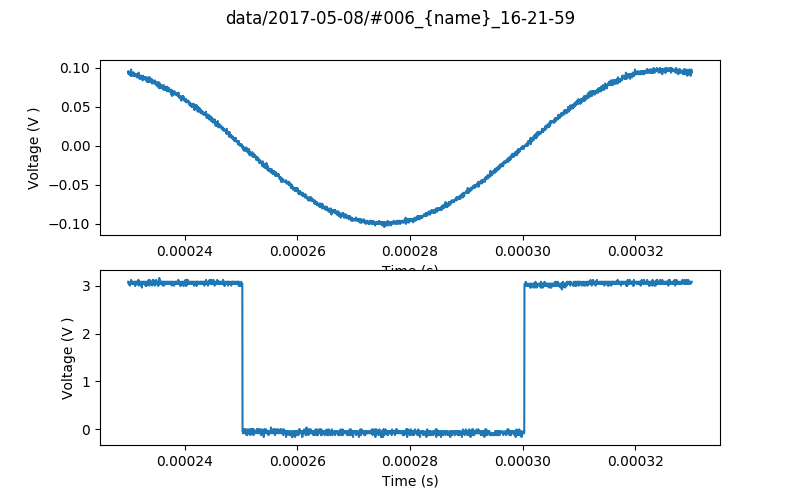

In [6]:
plot = MatPlot(subplots=(2, 1))
plot.add(data.TPS1_scope_measurement_0)
plot.add(data.TPS1_scope_measurement_1, subplot=2)

Change horisontal scale and remember to call `prepare_curvedata` to update the setpoint array

In [7]:
tps.horizontal_scale.set(25e-6)

In [8]:
tps.force_trigger()
sleep(11*tps.horizontal_scale.get_latest())
tps.ch1_curvedata.prepare_curvedata()
tps.ch2_curvedata.prepare_curvedata()
data2 = Measure(tps.ch1_curvedata, tps.ch2_curvedata).run()

DataSet:
   location = 'data/2017-05-08/#007_{name}_16-22-17'
   <Type>   | <array_id>               | <array.name>      | <array.shape>
   Measured | TPS1_scope_measurement_0 | scope_measurement | (2500,)
   Measured | TPS1_scope_measurement_1 | scope_measurement | (2500,)
acquired at 2017-05-08 16:22:30


<IPython.core.display.Javascript object>


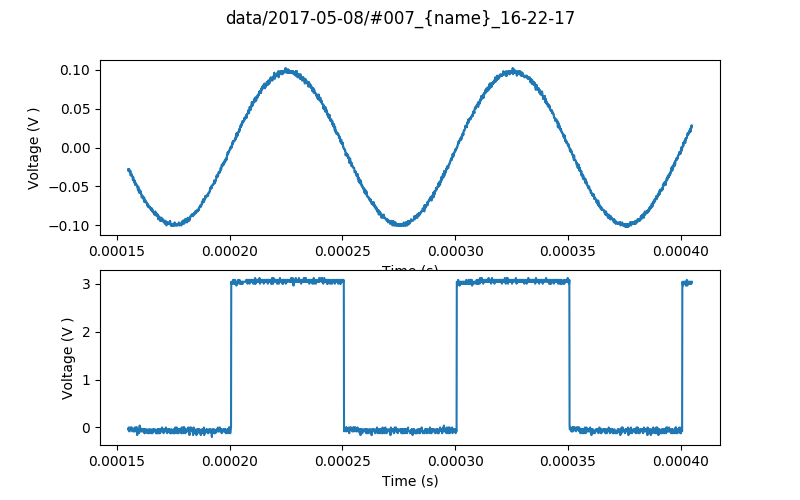

In [9]:
plot = MatPlot(subplots=(2, 1))
plot.add(data2.TPS1_scope_measurement_0)
plot.add(data2.TPS1_scope_measurement_1, subplot=2)

In [10]:
tps.close()